#  Students Performance Factors

####  About dataset

## Description:

This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.


---

**Column** **Descriptions**

---

Attribute	Description

**Hours_Studied:**	Number of hours spent studying per week.

**Attendance**:	Percentage of classes attended.

**Parental_Involvement**:	Level of parental involvement in the student's education (Low, Medium, High).

**Access_to_Resources**:	Availability of educational resources (Low, Medium, High).

**Extracurricular_Activities**:	Participation in extracurricular activities (Yes, No).

**Sleep_Hours**:	Average number of hours of sleep per night.

**Previous_Scores**:	Scores from previous exams.

**Motivation_Level**:	Student's level of motivation (Low, Medium, High).

**Internet_Access**:	Availability of internet access (Yes, No).

**Tutoring_Sessions**:	Number of tutoring sessions attended per month.

**Family_Income**:	Family income level (Low, Medium, High).

**Teacher_Quality**:	Quality of the teachers (Low, Medium, High).

**School_Type**:	Type of school attended (Public, Private).

**Peer_Influence**:	Influence of peers on academic performance (Positive, Neutral, Negative).

**Physical_Activity**:	Average number of hours of physical activity per week.

**Learning_Disabilities**:	Presence of learning disabilities (Yes, No).

**Parental_Education_Level**:	Highest education level of parents (High School, College, Postgraduate).

**Distance_from_Home**:	Distance from home to school (Near, Moderate, Far).

**Gender**: Gender of the student (Male, Female).

**Exam_Score**:	Final exam score (Target).

In [119]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/studentperformancefactors/StudentPerformanceFactors.csv


In [120]:
# Import necessary libraries for data manipulation, visualization, and model building
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [121]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fatihyavuzz/studentperformancefactors")


In [122]:
# Load the dataset from the CSV file
df=pd.read_csv("/kaggle/input/studentperformancefactors/StudentPerformanceFactors.csv")

In [123]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [124]:
##know more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [125]:
## describe the numerical columns
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [126]:
#columns names
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [127]:
df.shape

(6607, 20)

In [128]:
##duplication
df.duplicated().sum()

0

In [129]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [130]:
##missing values
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [131]:
df2=df.copy()

In [132]:
## filling the missing values with mode method
df2['Teacher_Quality'].fillna(df2['Teacher_Quality'].mode()[0],inplace = True)
df2['Parental_Education_Level'] = df2['Parental_Education_Level'].fillna(df2['Parental_Education_Level'].mode()[0])
df2['Distance_from_Home'] = df2['Distance_from_Home'].fillna(df2['Distance_from_Home'].mode()[0])

/tmp/ipykernel_36/1406072027.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Teacher_Quality'].fillna(df2['Teacher_Quality'].mode()[0],inplace = True)


In [133]:
df2.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [134]:
df2.nunique() 

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

### more information about the categorical columns

In [135]:
## defining categorical columns
categorical_cols = df2.select_dtypes(include=['object', 'category'])

In [136]:
## defining numerical columns 
numeric_cols = df2.select_dtypes(include=['int64', 'float64'])

In [137]:
numeric_cols

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70
...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68
6603,23,76,8,81,3,2,69
6604,20,90,6,65,3,2,68
6605,10,86,6,91,2,3,68


In [138]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({
        col_name: dataframe[col_name].value_counts(),  # Count of unique values
        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)  # Percentage of each unique value
    }))
    print("------------------------------------------------------------------")

for col in categorical_cols:
    cat_summary(df2, col)

                      Parental_Involvement      Ratio
Parental_Involvement                                 
Medium                                3362  50.885425
High                                  1908  28.878462
Low                                   1337  20.236113
------------------------------------------------------------------
                     Access_to_Resources      Ratio
Access_to_Resources                                
Medium                              3319  50.234600
High                                1975  29.892538
Low                                 1313  19.872862
------------------------------------------------------------------
                            Extracurricular_Activities      Ratio
Extracurricular_Activities                                       
Yes                                               3938  59.603451
No                                                2669  40.396549
------------------------------------------------------------------
     

In [139]:
### A function to visulaize each cat column with its values and %
def plot_pie_charts_for_categoricals(df2, columns=categorical_cols, max_categories=10):

    for col in columns:
        pie_info = df2[col].value_counts()# Plot
        plt.figure(figsize=(5,5))
        plt.pie(pie_info,labels=pie_info.index.astype(str),autopct='%1.1f%%',startangle=100)
        plt.title(f"Distribution of '{col}'")
        plt.show()


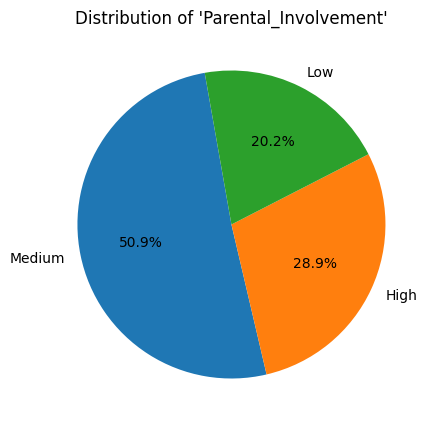

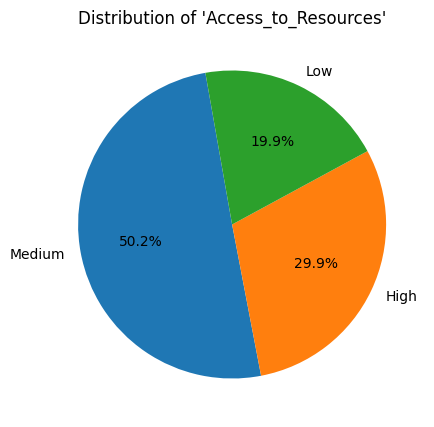

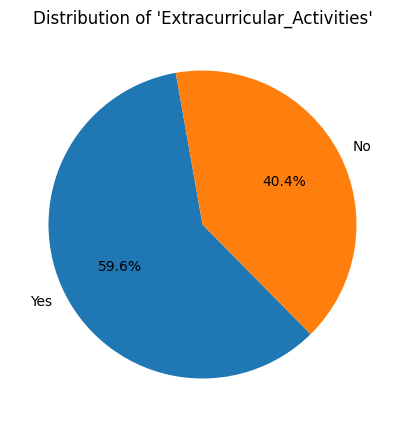

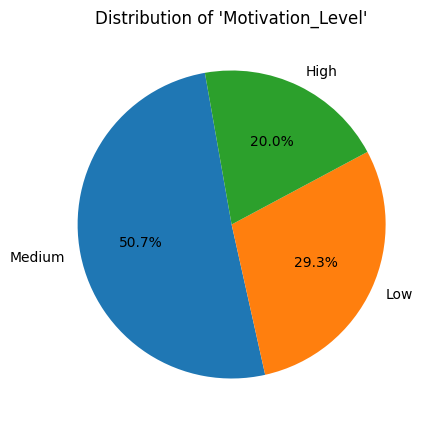

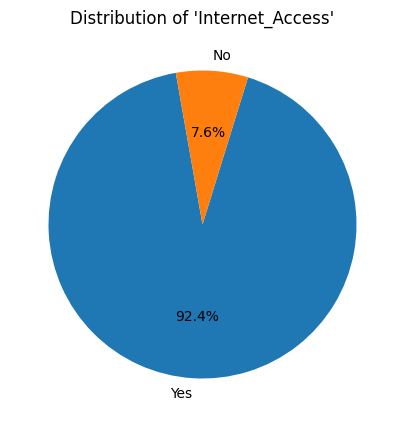

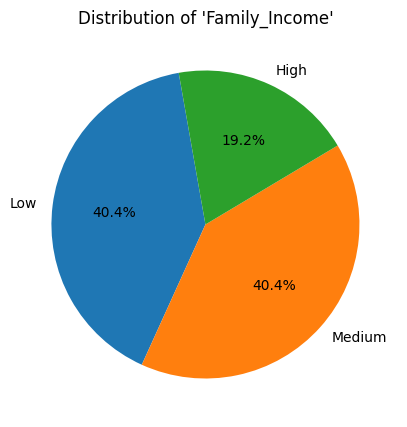

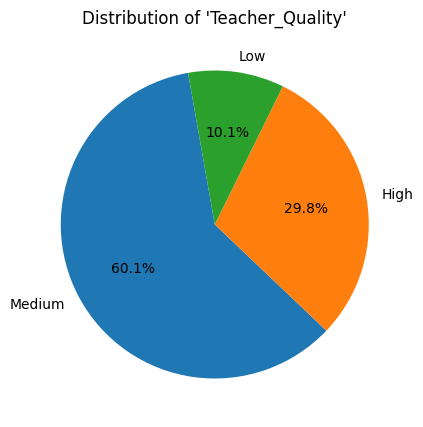

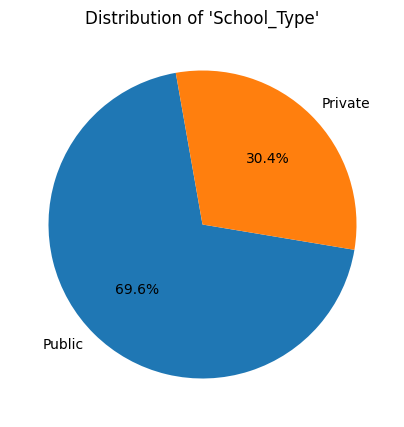

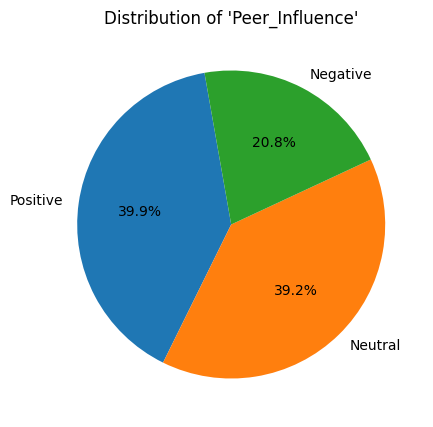

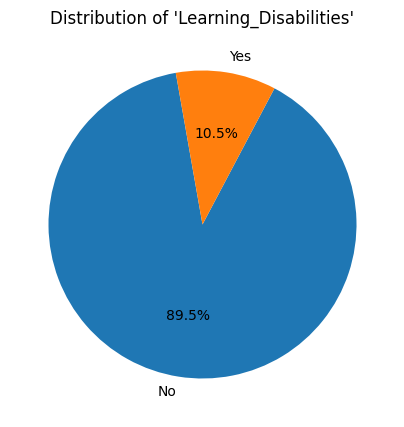

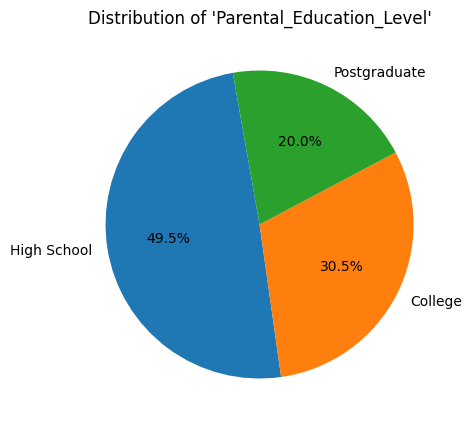

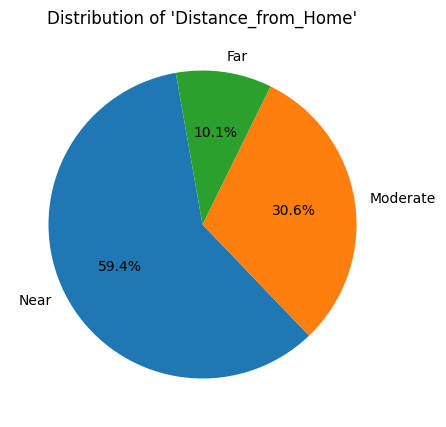

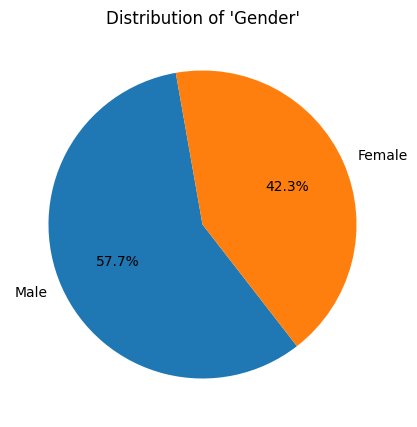

In [140]:
plot_pie_charts_for_categoricals(df)

In [141]:
df2=df.copy()

### Label encoder for the categorical columns 

### Finding outliers

In [142]:
# Select only numeric columns
numeric_cols = df2.select_dtypes(include='number')

# Function to count outliers using IQR
def count_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((col < lower_bound) | (col > upper_bound)).sum()

# Apply to all numeric columns
outlier_counts = numeric_cols.apply(count_outliers)

# Print number of outliers per column
print("Number of outliers per column:\n")
print(outlier_counts)

Number of outliers per column:

Hours_Studied         43
Attendance             0
Sleep_Hours            0
Previous_Scores        0
Tutoring_Sessions    430
Physical_Activity      0
Exam_Score           104
dtype: int64


In [143]:
df2.loc[df2['Exam_Score'] > 100, 'Exam_Score'] = 100

In [144]:
df2.groupby('Extracurricular_Activities')['Exam_Score'].mean().round(2)

Extracurricular_Activities
No     66.93
Yes    67.44
Name: Exam_Score, dtype: float64

In [145]:
df2.groupby('Access_to_Resources')['Exam_Score'].mean().round(2)

Access_to_Resources
High      68.09
Low       66.20
Medium    67.13
Name: Exam_Score, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


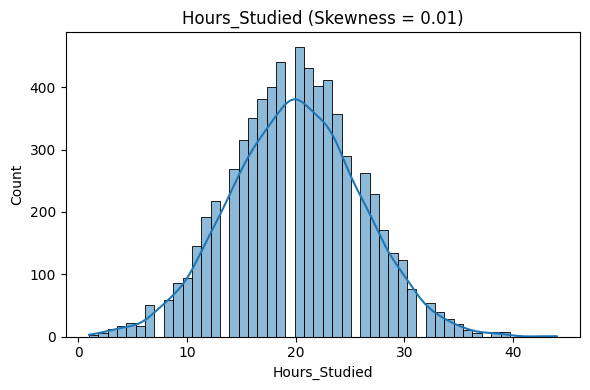

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


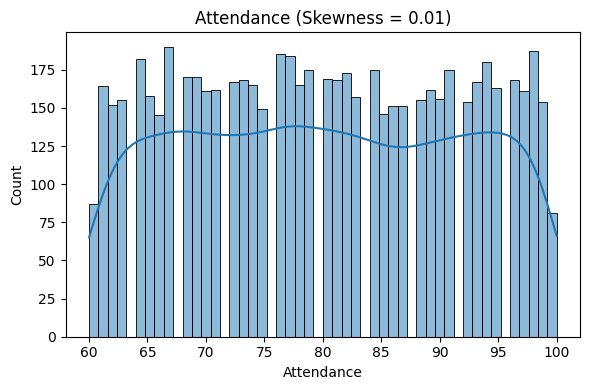

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


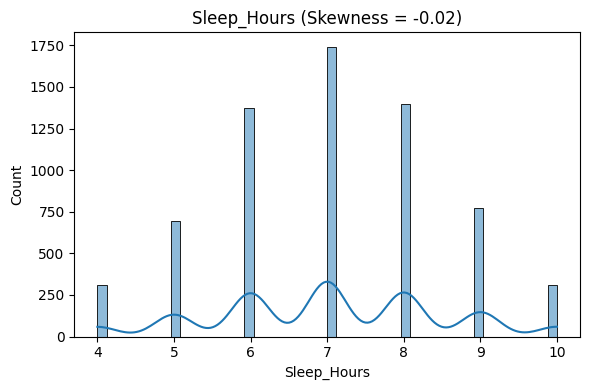

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


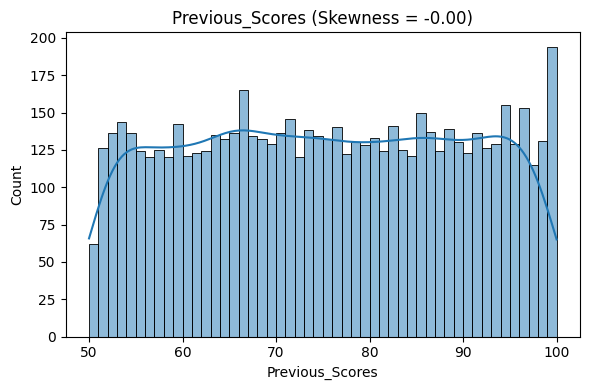

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


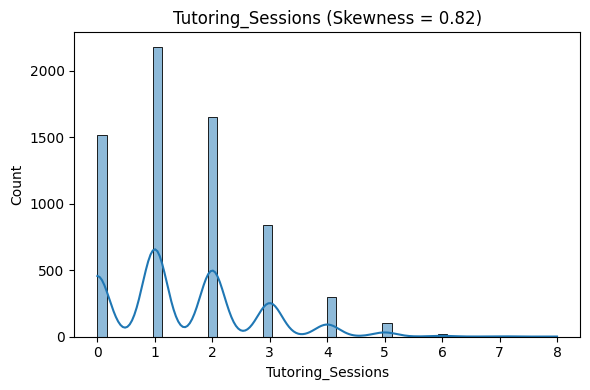

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


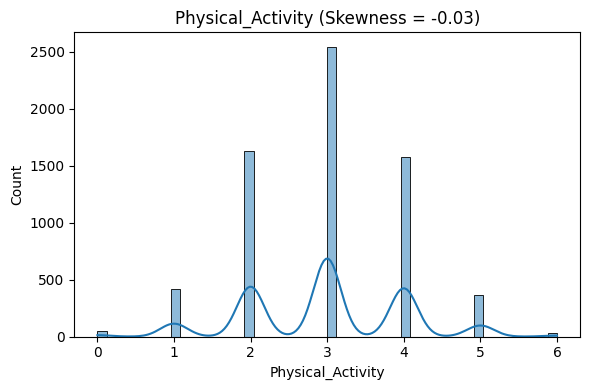

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


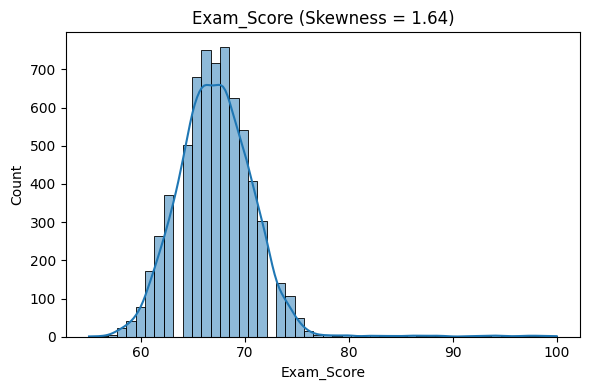

In [146]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df2[col], kde=True, bins=50)
    plt.title(f'{col} (Skewness = {df2[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

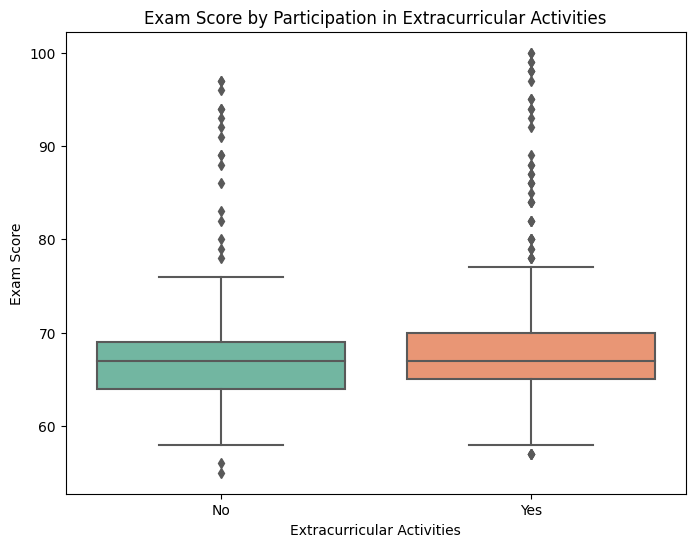

In [147]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, x='Extracurricular_Activities', y='Exam_Score', palette='Set2')
plt.title('Exam Score by Participation in Extracurricular Activities')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Exam Score')
plt.show()

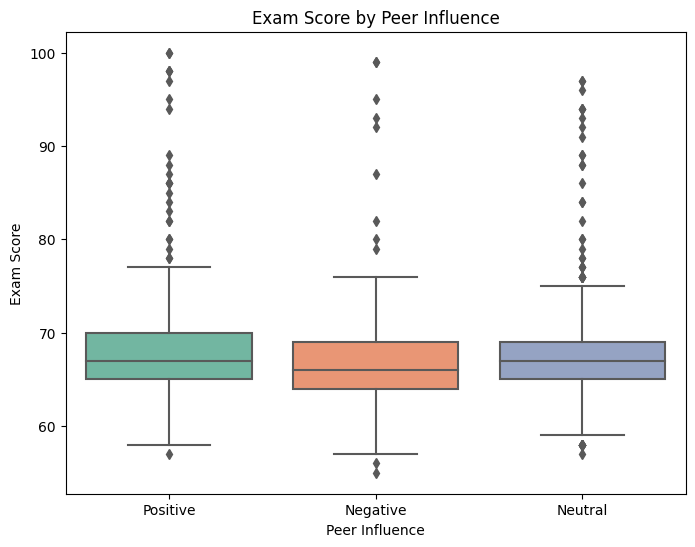

In [148]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, x='Peer_Influence', y='Exam_Score', palette='Set2')
plt.title('Exam Score by Peer Influence')
plt.xlabel('Peer Influence')
plt.ylabel('Exam Score')
plt.show()


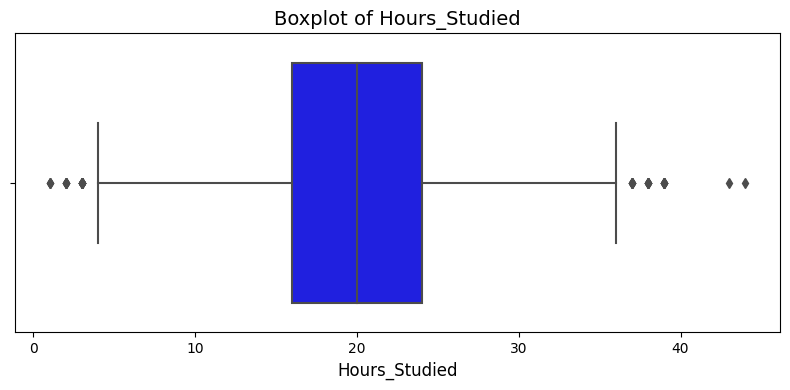

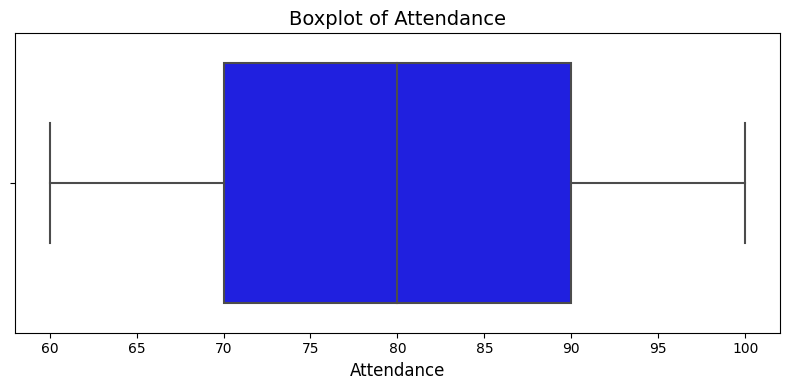

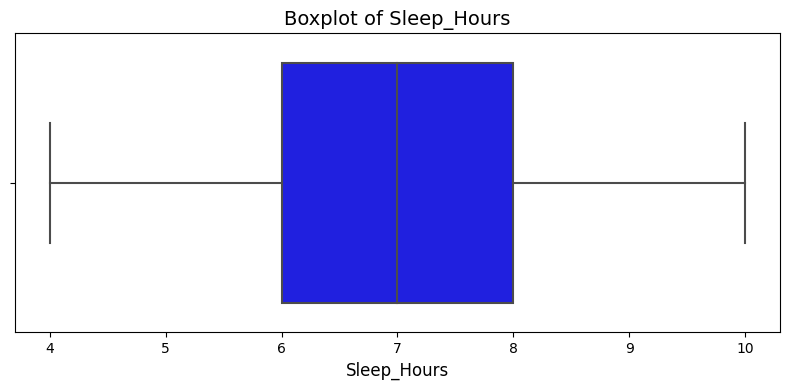

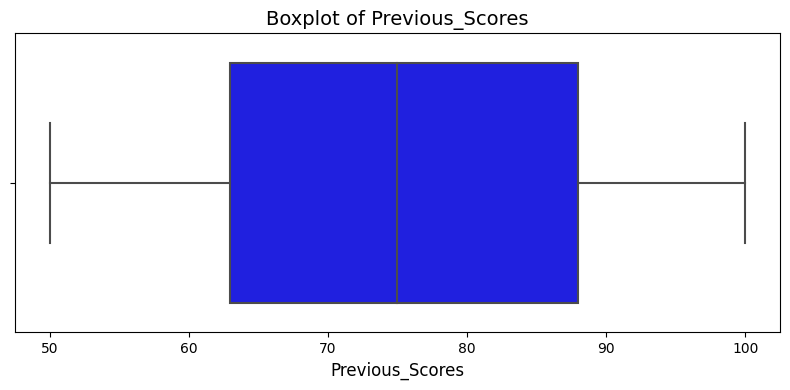

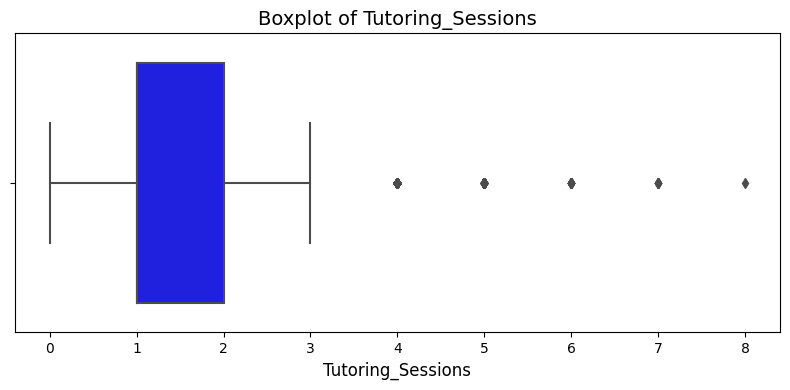

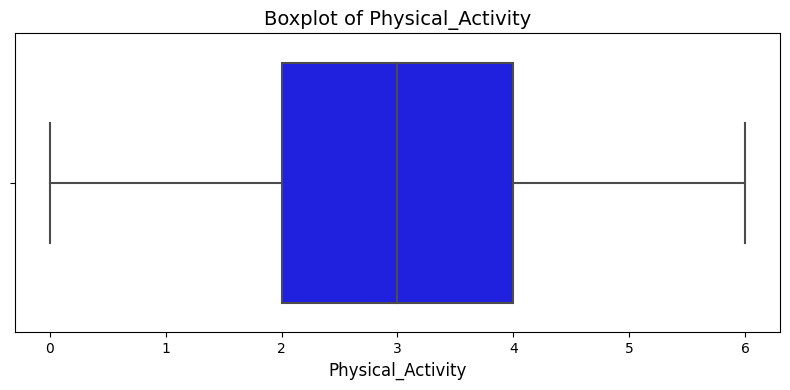

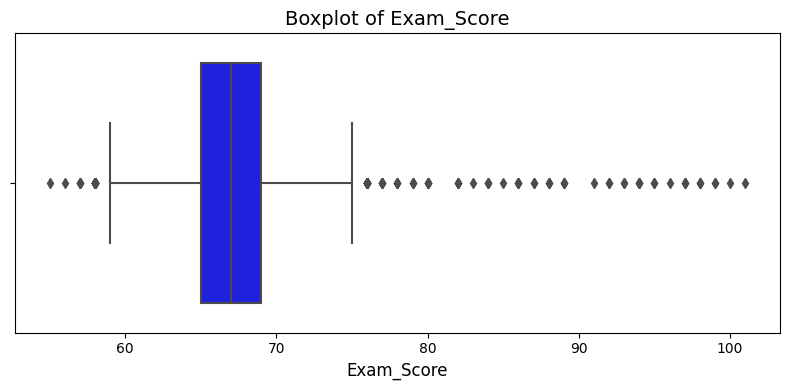

In [149]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='blue')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Exam_Score', ylabel='Count'>

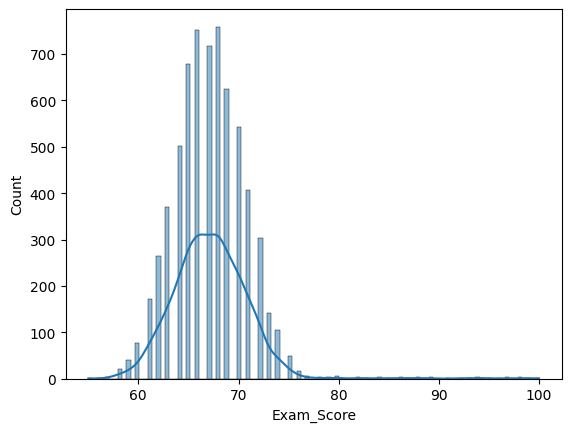

In [150]:
sns.histplot(df2['Exam_Score'], kde=True)

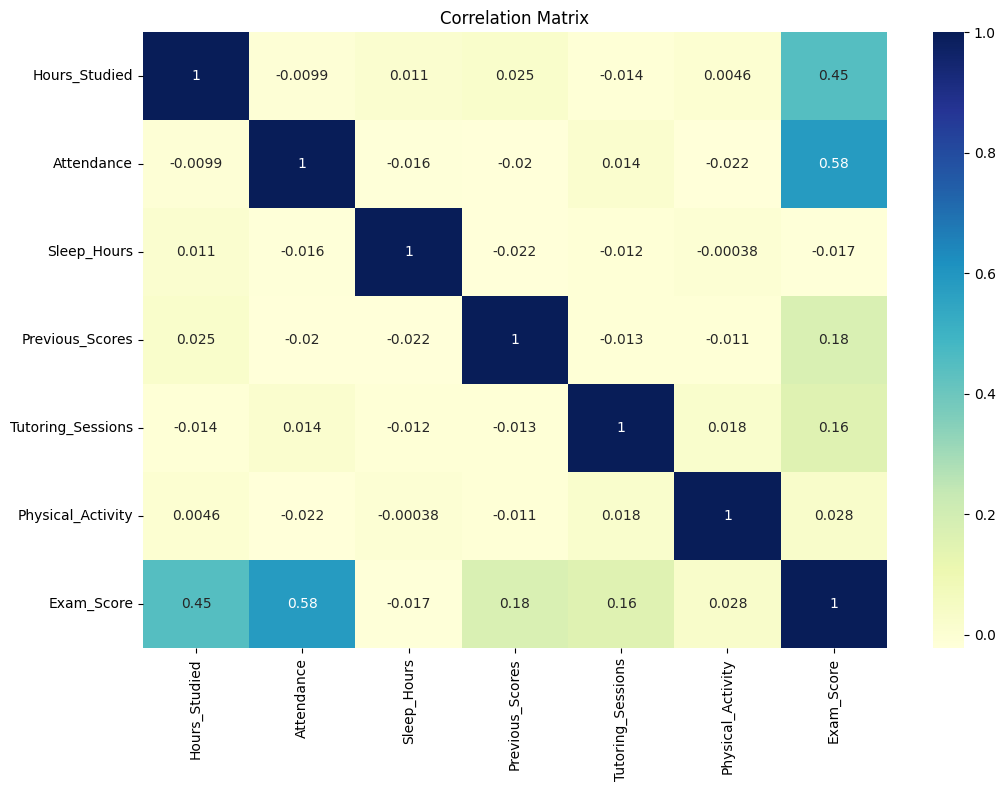

In [152]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()

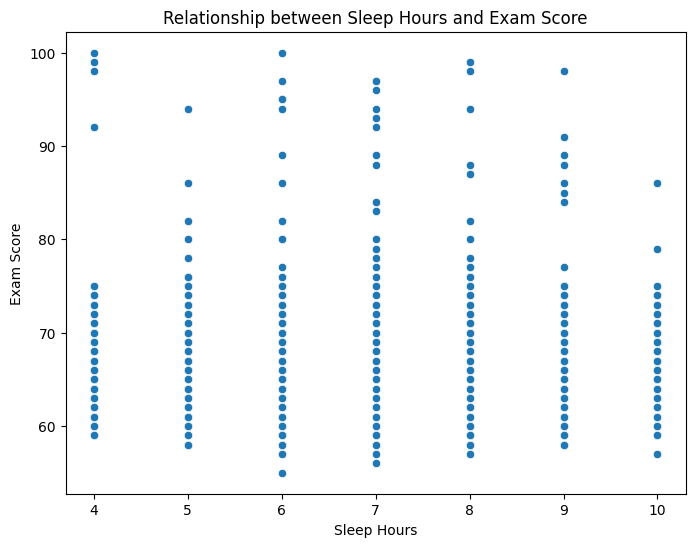

In [154]:
plt.figure(figsize=(8, 6))

# scatter plot
sns.scatterplot(data=df2, x='Sleep_Hours', y='Exam_Score')
# تخصيص العناوين
plt.title('Relationship between Sleep Hours and Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.show()

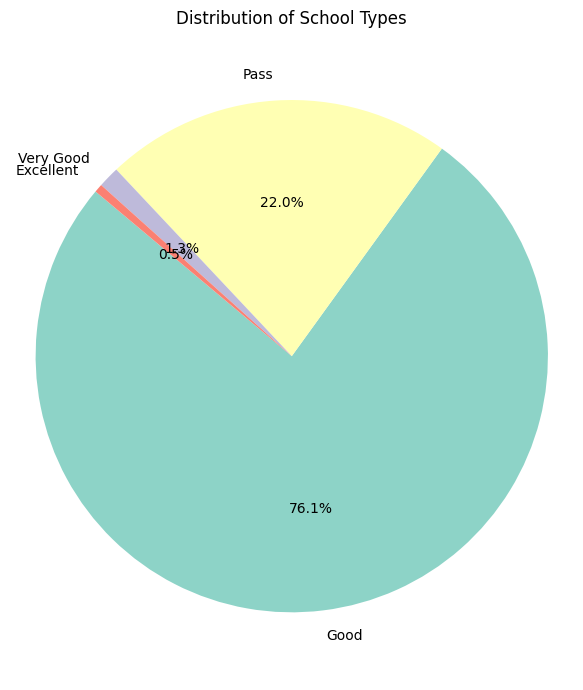

In [165]:
Grade_counts = df2['Grade'].value_counts()

#Pie Chart
plt.figure(figsize=(6, 7))
plt.pie(
    Grade_counts,
    labels=Grade_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set3")
)
plt.title('Distribution of School Types')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [187]:
le = LabelEncoder()
df2['Grade'] = le.fit_transform(df2['Grade'])

### Splitting the data

In [188]:
# Split the features and target
X = df2.drop('Exam_Score', axis=1)
y = df2['Exam_Score']

In [189]:
X

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Grade
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,1
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,2
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,1
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,1
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0,1
6603,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0,1
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0,1
6605,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0,1


In [190]:
X.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Grade
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,1.220070,1.203421,0.596035,7.02906,75.070531,1.307553,0.924474,1.493719,1.211442,1.322991,0.695929,1.190858,2.967610,0.105191,0.923717,1.508552,0.577267,1.241411
std,5.990594,11.547475,0.865634,0.871783,0.490728,1.46812,14.399784,0.782515,0.264258,1.230570,0.742264,0.912020,0.460048,0.755876,1.031231,0.306823,0.739806,0.685173,0.494031,0.469788
min,1.000000,60.000000,0.000000,0.000000,0.000000,4.00000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,70.000000,0.000000,0.000000,0.000000,6.00000,63.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,20.000000,80.000000,2.000000,2.000000,1.000000,7.00000,75.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,2.000000,1.000000,1.000000
75%,24.000000,90.000000,2.000000,2.000000,1.000000,8.00000,88.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,4.000000,0.000000,1.000000,2.000000,1.000000,1.000000
max,44.000000,100.000000,2.000000,2.000000,1.000000,10.00000,100.000000,2.000000,1.000000,8.000000,2.000000,3.000000,1.000000,2.000000,6.000000,1.000000,3.000000,3.000000,1.000000,3.000000


In [191]:
y

0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: Exam_Score, Length: 6607, dtype: int64

In [192]:
for col in categorical_cols:
    df2[col] = LabelEncoder().fit_transform(df2[col])

print(df2)


      Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0                23          84                     1                    0   
1                19          64                     1                    2   
2                24          98                     2                    2   
3                29          89                     1                    2   
4                19          92                     2                    2   
...             ...         ...                   ...                  ...   
6602             25          69                     0                    2   
6603             23          76                     0                    2   
6604             20          90                     2                    1   
6605             10          86                     0                    0   
6606             15          67                     2                    1   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores 

In [193]:
X

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Grade
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,1
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,2
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,1
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,1
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0,1
6603,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0,1
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0,1
6605,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0,1


In [194]:
# 4. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Polynomial Regression

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [199]:
poly_features = PolynomialFeatures(degree=3) # You can change the degree
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train a Linear Regression model on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_poly = poly_model.predict(X_test_poly)
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree 3) Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

Polynomial Regression (Degree 3) Performance:
MAE: 0.40
MSE: 0.48
RMSE: 0.69
R²: 0.9660


In [200]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
poly_pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=3), LinearRegression())

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(poly_pipeline, X, y, cv=cv, scoring='r2')

print("\n Corrected Cross-Validation R² Scores:", cv_scores)
print(" Average R²:", cv_scores.mean())
print(" Standard Deviation:", cv_scores.std())


 Corrected Cross-Validation R² Scores: [0.9657205  0.97321312 0.97792303 0.96891452 0.97709089]
 Average R²: 0.9725724124198709
 Standard Deviation: 0.004685831599587921


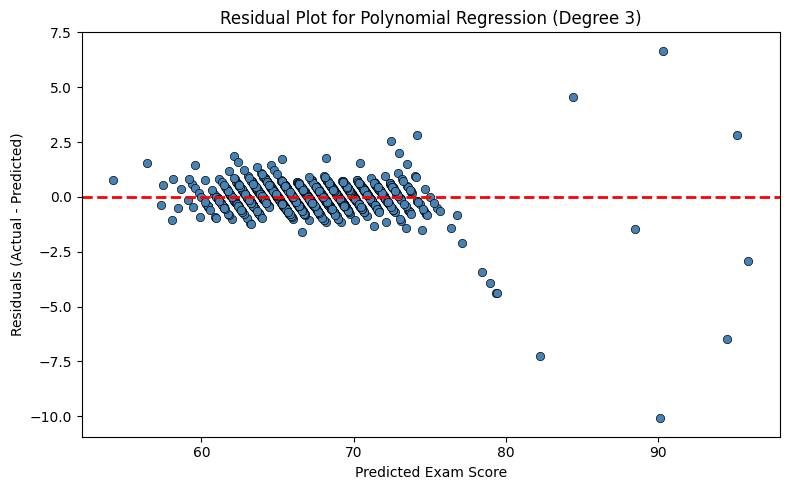

In [205]:
residuals = y_test - y_pred_poly

# residual plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_poly, y=residuals, color='steelblue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Polynomial Regression (Degree 3)")
plt.tight_layout()
plt.show()

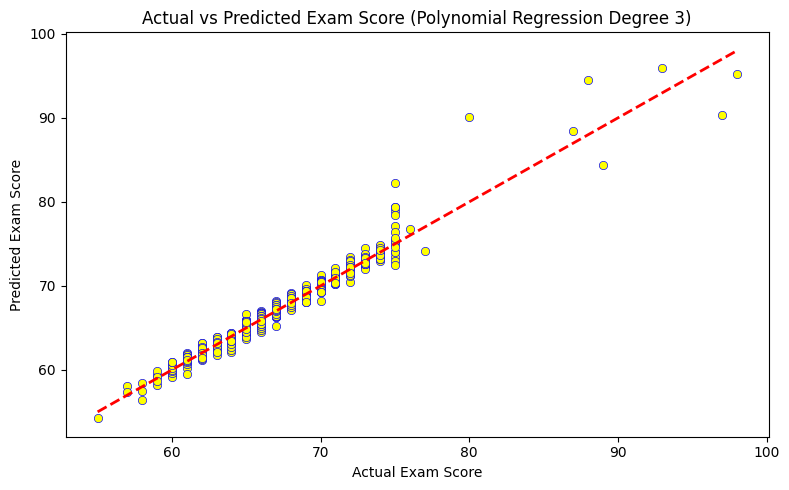

In [206]:
#  Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_poly, color='yellow', edgecolor='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) 
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Score (Polynomial Regression Degree 3)")
plt.tight_layout()
plt.show()